# ENCORE basic demo
<p> In this notebook you'll learn how to generate synthetic MEC and LEC ratemaps, train the ENCORE model to reconstruct those ratemaps, and inspect hidden layers rate maps </p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from encore import Encore
from env import Arena

# Build training data structure

<li> Each input vector represents the population vector activity of MEC and LEC cells at a given location.
<li> 30% of the vector contains MEC cells, whereas 70% contains LEC cells.

In [2]:
# Make data structure combining both MEC and LEC 
n_mec = 90
n_lec = 210
arena_size = [60, 60]
arena = Arena(arena_size=arena_size, n_mec=n_mec, n_lec=n_lec)
data = arena.get_rateMaps()

# Example rate maps

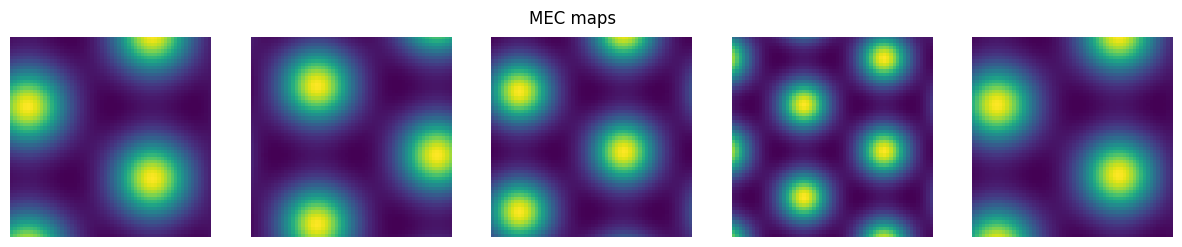

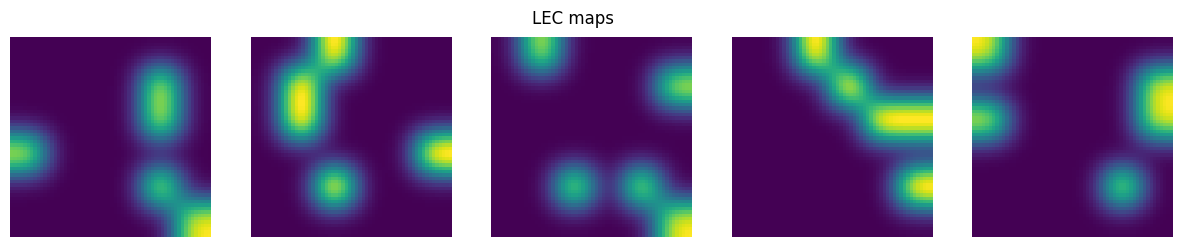

In [3]:
arena.plot_rateMaps()

# ENCORE model

<li> We then train an autoencoder to reconstruct the input vectors (MEC + LEC).

In [4]:
## Define the model's parameters
n_DG, n_CA3, n_CA1 = [100, 80, 100] 

model = Encore(n_DG=n_DG, n_CA3=n_CA3, n_CA1=n_CA1, dim=n_mec+n_lec)
history = model.run_train(data=data, num_epochs=200)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          30,100
            Linear-2                   [-1, 80]           8,080
            Linear-3                  [-1, 100]           8,100
            Linear-4                  [-1, 300]          30,300
Total params: 76,580
Trainable params: 76,580
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.29
Estimated Total Size (MB): 0.30
----------------------------------------------------------------
Epoch 0/200: MAE=0.0042
Epoch 10/200: MAE=0.0008
Epoch 20/200: MAE=0.0006
Epoch 30/200: MAE=0.0007
Epoch 40/200: MAE=0.0005
Epoch 50/200: MAE=0.0006
Epoch 60/200: MAE=0.0005
Epoch 70/200: MAE=0.0006
Epoch 80/200: MAE=0.0005
Epoch 90/200: MAE=0.0005
Epoch 100/200: MAE=0.0005
Epoch 110/200: MAE=0.0004

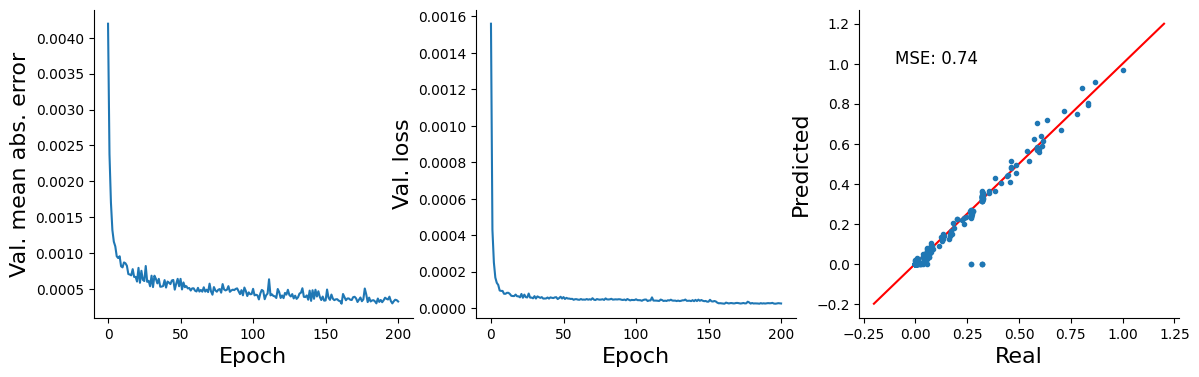

In [5]:
fig, ax = plt.subplots(1, 3, figsize=[14, 4])
fig.set_facecolor("white")

ax[0].plot(history["epoch_n"], history["val_mae"])
ax[0].set_xlabel("Epoch", fontsize=16)
ax[0].set_ylabel("Val. mean abs. error", fontsize=16)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)    

ax[1].plot(history["epoch_n"], history["val_loss"])
ax[1].set_xlabel("Epoch", fontsize=16)
ax[1].set_ylabel("Val. loss", fontsize=16)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[2].spines["right"].set_visible(False)
ax[2].spines["top"].set_visible(False)

pos_n = 10
pred = model.test(np.array([data[pos_n]])).T
mse = np.round(np.sqrt(np.sum(np.power(data[pos_n] - pred[:, 0], 2))), 2)
tt = f"MSE: {mse:.2f}"

ax[2].plot([-.2, 1.2],[-.2, 1.2], "r")
ax[2].plot(data[pos_n], pred , "o", markersize=3)
ax[2].text(-.1, 1, tt, fontsize=12)
ax[2].set_xlabel("Real", fontsize=16)
ax[2].set_ylabel("Predicted", fontsize=16);

# Extract firing rate maps for hidden layers
<p>Now randomly select a few neurons from each layer and see whether their firing rate resembles those of place cells.</p>

<h3>DG

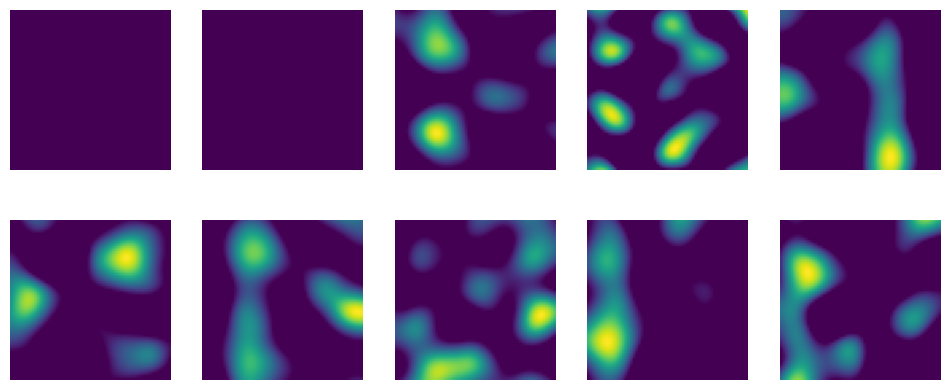

In [9]:
heatmaps_DG = np.zeros((n_DG, arena_size[0], arena_size[1]))
layer = "DG"

heatmaps_DG = model.get_output(layer=layer, data=data)
maxx = heatmaps_DG.max()

fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i, subax in enumerate(ax.ravel()):
    subax.imshow(heatmaps_DG[:, i].reshape(arena_size))
    subax.axis("off")

<h3>CA3

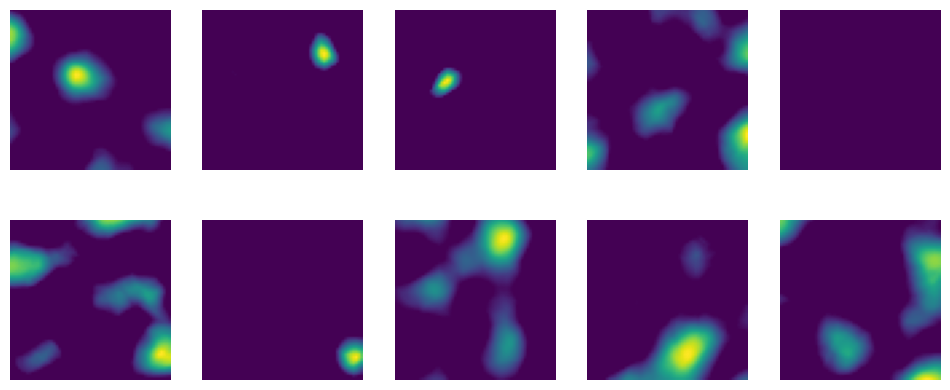

In [10]:
heatmaps_CA3 = np.zeros((n_CA3, arena_size[0], arena_size[1]))
layer = "CA3"

heatmaps_CA3 = model.get_output(layer=layer, data=data)
maxx = heatmaps_CA3.max()

fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i, subax in enumerate(ax.ravel()):
    subax.imshow(heatmaps_CA3[:, i].reshape(arena_size))
    subax.axis("off")

<h3>CA1

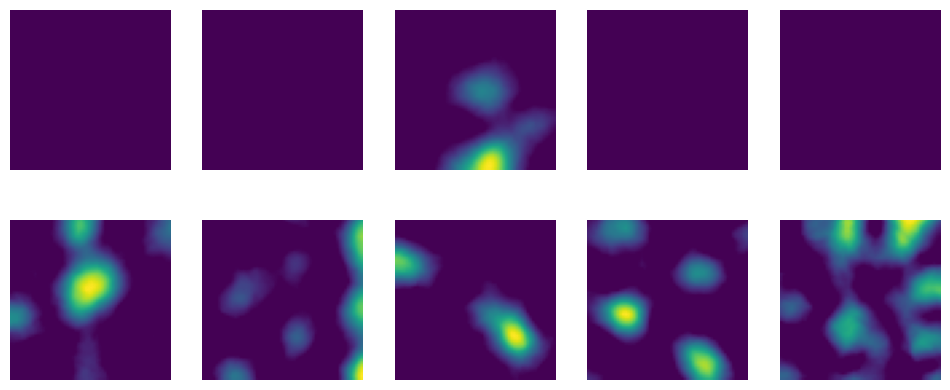

In [11]:
heatmaps_CA1 = np.zeros((n_CA1, arena_size[0], arena_size[1]))                  
layer = "CA1"

heatmaps_CA1 = model.get_output(layer=layer, data=data)
maxx = heatmaps_CA1.max()

fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i, subax in enumerate(ax.ravel()):
    subax.imshow(heatmaps_CA1[:, i].reshape(arena_size))
    subax.axis("off")

### ... and these are the basics of ENCORE.
#### From here on you will be able to test multiple questions, such as memory capacity, novelty detection, rate remapping, and many more.